In [1]:
import numpy as np
import pandas as pd

#the laplace mechanism
#using the example generated


ages = [25,30,35,40,45,50,55,60,65,70] #10 patients with the following ages

true_average_age = np.sum(ages)/len(ages)

sensitivity = (np.max(ages)-np.min(ages))/len(ages)

epsilon = 1.0 #this is given

noise_scale = sensitivity/epsilon

laplace_noise = np.random.laplace(0,noise_scale)

repeated_average_age = true_average_age + laplace_noise
print(repeated_average_age)

39.2565301228004


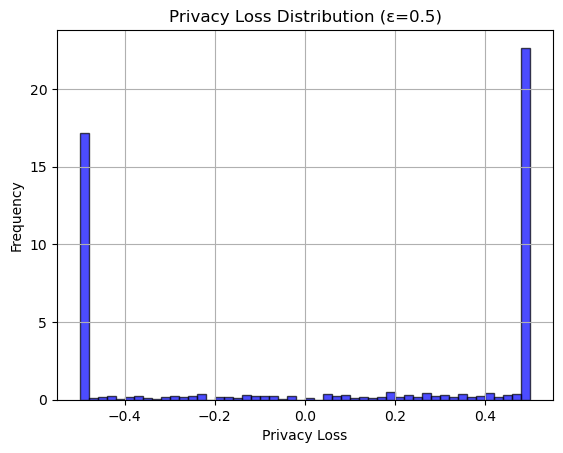

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def laplace_mechanism(true_value, sensitivity, epsilon):
    """Applies Laplace noise to a true value for differential privacy."""
    scale = sensitivity / epsilon  # Laplace scale (b)
    noise = np.random.laplace(0, scale)  # Draw noise from Laplace distribution
    return true_value + noise

def privacy_loss(output, x, y, sensitivity, epsilon):
    """Computes the privacy loss function L(o; x, y)."""
    scale = sensitivity / epsilon
    prob_x = np.exp(-abs(output - x) / scale) / (2 * scale)
    prob_y = np.exp(-abs(output - y) / scale) / (2 * scale)
    return np.log(prob_x / prob_y)

# Example: Two neighboring datasets
true_x = 100  # Query result for dataset X (e.g., avg income)
true_y = 101  # Query result for dataset Y (neighboring dataset)

sensitivity = 1  # Sensitivity of the function (max change due to 1 individual)
epsilon = 0.5  # Privacy budget (smaller = more private)

# Generate noisy outputs using Laplace mechanism
noisy_outputs = [laplace_mechanism(true_x, sensitivity, epsilon) for _ in range(1000)]

# Compute privacy loss for different outputs
loss_values = [privacy_loss(o, true_x, true_y, sensitivity, epsilon) for o in noisy_outputs]

# Plot Privacy Loss Distribution
plt.hist(loss_values, bins=50, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.xlabel("Privacy Loss")
plt.ylabel("Frequency")
plt.title(f"Privacy Loss Distribution (ε={epsilon})")
plt.grid(True)
plt.show()